In [78]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [79]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [80]:
# File to Load 
mouse_drug_data_to_load = "C:/Users/dbruen/Documents/Data Analytics/CU Bootcamp Homework/05 Matplotlib HW/Pymaceuticals_DanBruen/Pymaceutical_Data/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/dbruen/Documents/Data Analytics/CU Bootcamp Homework/05 Matplotlib HW/Pymaceuticals_DanBruen/Pymaceutical_Data/clinical_trial_data.csv"


In [81]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

In [82]:
# Combine the data into a single dataset
drug_data_df = pd.merge(trial_df, mouse_data, on="Mouse ID")

In [83]:
# Display the data table for preview
drug_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [84]:
# **Tumor Response to Treatment**

In [85]:
# Convert to DataFrame - this has already been done, essentially
mean_tumor_vol = drug_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
mean_tumor_vol = pd.DataFrame(mean_tumor_vol).reset_index()

In [86]:
# Preview DataFrame
mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [89]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
## Import SEM Dependencies
from scipy.stats import sem
from random import random

In [90]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = drug_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
sem_tumor_vol

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
                          ...   
Zoniferol  25           0.602513
           30           0.800043
           35           0.881426
           40           0.998515
           45           1.003576
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [91]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
reformed_mean_tumor_vol = mean_tumor_vol.pivot(index="Timepoint", 
                                                   columns="Drug",
                                                   values="Tumor Volume (mm3)")
reformed_mean_tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [92]:
# Generate the Plot (with Error Bars)
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment

In [93]:
# list out all the individual drugs
reformed_mean_tumor_vol.axes[1].tolist()

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [94]:
# Set Vriables
## List out all the drugs into variable
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

Text(0, 0.5, 'Tumor Volume (mm3)')

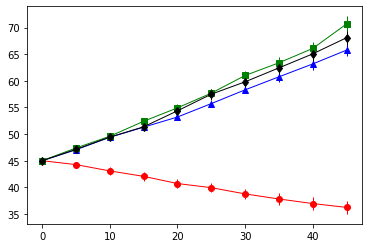

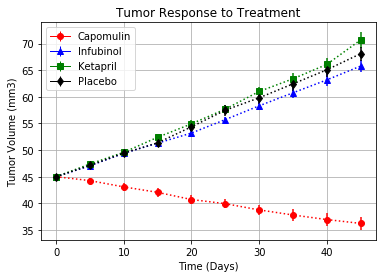

In [176]:
# Generate the Plot (with Error Bars)
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
plt_style_dict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

Capomulin_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Capomulin'], yerr = sem_tumor_vol['Capomulin'], color = 'r', marker = 'o', linewidth = 1, label="Capomulin")
Infubinol_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Infubinol'], yerr = sem_tumor_vol['Infubinol'], color = 'b', marker = '^', linewidth = 1, label="Infubinol")
Ketapril_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Ketapril'], yerr = sem_tumor_vol['Ketapril'], color = 'g', marker = 's', linewidth = 1, label="Ketapril")
Placebo_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Placebo'], yerr = sem_tumor_vol['Placebo'], color = 'k', marker = 'd', linewidth = 1, label="Placebo")

fig1, ax1 = plt.subplots()
for drug in drug_list:
    ax1.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol[drug], sem_tumor_vol[drug], fmt = plt_style_dict[drug])
    
plt.legend(handles=[Capomulin_response, Infubinol_response, Ketapril_response, Placebo_response], loc="best")
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')



In [177]:
# Save the Figure
#Save plot 
plt.savefig("TumorResponseToTreatment.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [178]:
# ** Metastatic Response to Treatment **

In [179]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = drug_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
mean_met.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [180]:
# Dataframe
mean_met = drug_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
mean_met_df = pd.DataFrame(mean_met).reset_index()
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [181]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites = drug_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
sem_met_sites.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [187]:
# Convert to DataFrame
sem_met_sites_df = pd.DataFrame(sem_met_sites).reset_index()

In [188]:
# Preview DataFrame
sem_met_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [189]:
# Minor Data Munging to Re-Format the Data Frames
reformed_met_sites = mean_met_df.pivot(index="Timepoint", 
                                                   columns="Drug",
                                                   values="Metastatic Sites")
sem_met_sites_df = sem_met_sites_df.pivot(index="Timepoint", 
                                                   columns="Drug",
                                                   values="Metastatic Sites")
reformed_met_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Text(0, 0.5, 'Metastatic Sites')

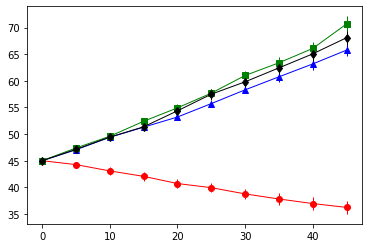

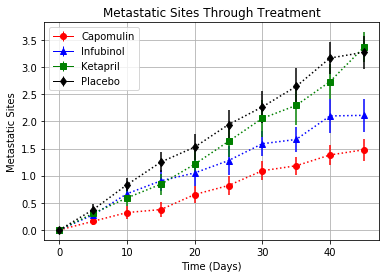

In [190]:
# Generate the Plot (with Error Bars)
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
plt_style_dict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

Capomulin_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Capomulin'], yerr = sem_tumor_vol['Capomulin'], color = 'r', marker = 'o', linewidth = 1, label="Capomulin")
Infubinol_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Infubinol'], yerr = sem_tumor_vol['Infubinol'], color = 'b', marker = '^', linewidth = 1, label="Infubinol")
Ketapril_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Ketapril'], yerr = sem_tumor_vol['Ketapril'], color = 'g', marker = 's', linewidth = 1, label="Ketapril")
Placebo_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Placebo'], yerr = sem_tumor_vol['Placebo'], color = 'k', marker = 'd', linewidth = 1, label="Placebo")

fig1, ax1 = plt.subplots()
for drug in drug_list:
    ax1.errorbar(reformed_met_sites.index, reformed_met_sites[drug], sem_met_sites_df[drug], fmt = plt_style_dict[drug])
    
plt.legend(handles=[Capomulin_response, Infubinol_response, Ketapril_response, Placebo_response], loc="best")
plt.grid(True)
plt.title('Metastatic Sites Through Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')



In [233]:
# Save the Figure
plt.savefig("MetSitesThroughTreatment.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [195]:
# ** Survival Rates **
# Set Dependencies

In [196]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_data_df = pd.merge(trial_df, mouse_data, on="Mouse ID")
mice_count = drug_data_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
mice_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [197]:
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count).reset_index()

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [225]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_over_time = mice_count_df.pivot(index="Timepoint", 
                                                   columns="Drug",
                                                   values="Mouse ID")
# Preview the Data Frame
mice_count_over_time

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [226]:
# Generate the Plot (Accounting for percentages)
# Mouse Survival Rate Percentages
for column in mice_count_over_time.columns:
    mouse_survival_rate = mice_count_over_time[column]/25 *100

In [227]:
# Test to see if Mouse Survival Calculation works
mouse_survival_rate

Timepoint
0     100.0
5      96.0
10     88.0
15     84.0
20     68.0
25     64.0
30     60.0
35     56.0
40     56.0
45     56.0
Name: Zoniferol, dtype: float64

Text(0, 0.5, 'Survival Rate (%)')

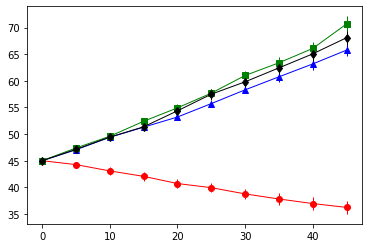

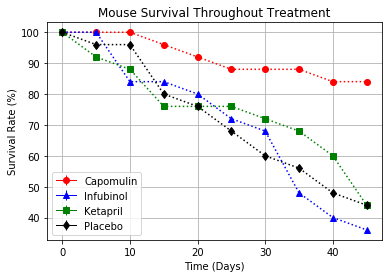

In [232]:
# Generate the Plot (Accounting for percentages)
# Create a Mouse Survival Rate DataFrame
mouse_survival_rate = pd.DataFrame()
for column in mice_count_over_time.columns:
    mouse_survival_rate[column] = mice_count_over_time[column]/25 *100
    
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
plt_style_dict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

Capomulin_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Capomulin'], yerr = sem_tumor_vol['Capomulin'], color = 'r', marker = 'o', linewidth = 1, label="Capomulin")
Infubinol_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Infubinol'], yerr = sem_tumor_vol['Infubinol'], color = 'b', marker = '^', linewidth = 1, label="Infubinol")
Ketapril_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Ketapril'], yerr = sem_tumor_vol['Ketapril'], color = 'g', marker = 's', linewidth = 1, label="Ketapril")
Placebo_response = plt.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol['Placebo'], yerr = sem_tumor_vol['Placebo'], color = 'k', marker = 'd', linewidth = 1, label="Placebo")

fig3, ax3 = plt.subplots()
for drug in drug_list:
    plt.plot(mouse_survival_rate.index, mouse_survival_rate[drug], plt_style_dict[drug])

plt.legend(handles=[Capomulin_response, Infubinol_response, Ketapril_response, Placebo_response], loc="best")
plt.grid(True)
plt.title('Mouse Survival Throughout Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')

In [234]:
# Save the Figure
plt.savefig("MouseSurvivalRate.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [238]:
# ** Summary Bar Graph **
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days
percent_chg_tumor_drug = (reformed_mean_tumor_vol.iloc[9, :] - reformed_mean_tumor_vol.iloc[0, :])/reformed_mean_tumor_vol.iloc[0, :] * 100
# Display the data to confirm
print(percent_chg_tumor_drug)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


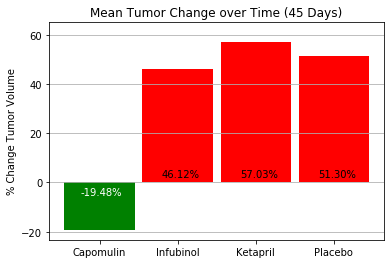

In [244]:
# Store all Relevant Percent Changes into a Tuple
percent_chg = percent_chg_tumor_drug.to_frame()
percent_chg = percent_chg.rename(columns = {0: "Percent Change"})
# Splice the data between passing and failing drugs
percent_chg["Pass"] = (percent_chg < 0)

fig4, ax4 = plt.subplots()
x = 0

for drug in drug_list:
    y = percent_chg.loc[drug, "Percent Change"]
    if percent_chg.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = "g")
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = "r")
        plt.text(x-.2, 2, '{:.2f}%'.format(y), color = "black")
    x = 1 + x
    
plt.yticks((-20, 0, 20, 40, 60))
ax4.yaxis.grid()
plt.title("Mean Tumor Change over Time (45 Days)")
plt.ylabel("% Change Tumor Volume")
plt.ylim(ymax = 65)

plt.savefig("MeanTumorChange.png")

plt.show()

In [247]:
# Save the Figure
plt.savefig("MeanTumorChange.png")

plt.show()

# Show the Figure


<Figure size 432x288 with 0 Axes>

In [ ]:
# Written description of three observable trends based on the data.

# 1.	Capomulin was the most effective drug in reducing tumor volume over the course of the 45-day trial.
# 2.	Capomulin also was shown to be the most effective drug in reducing metastatic sites over the course of the 45-day trial as well as the highest survival rate.
# 3.	Both Infubinol and Ketapril performed similarly to the Placebo, proving themselves to be ineffective treatments. 
